In [1]:
# the combined dataset of 2012 and 2013 
import pandas as pd
from pickup_utilities import *
df = pd.read_csv("../data/complete.csv")
df['tstamp'] = df.apply(tstampCalc, axis = 1)
df.head()

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
0,0,2012-02-01 00:00:00,2012,2,1,0,0,3.771,0.126,2.798,...,2,4,8,79,5,494,117.266000,0.237381,0.301358,0:00
1,1,2012-02-01 00:30:00,2012,2,1,0,30,3.555,0.110,1.809,...,2,4,8,79,5,494,179.440999,0.363241,0.838331,0:30
2,2,2012-02-01 01:00:00,2012,2,1,1,0,3.831,0.068,0.956,...,2,4,8,79,5,494,161.779999,0.327490,0.763164,1:00
3,3,2012-02-01 01:30:00,2012,2,1,1,30,2.852,0.085,0.925,...,2,4,8,79,5,494,144.735001,0.292986,0.704198,1:30
4,4,2012-02-01 02:00:00,2012,2,1,2,0,2.224,0.097,1.071,...,2,4,8,79,5,494,136.147000,0.275601,0.674146,2:00


In [4]:
# Create a dataframe representing energy consumption for February 11th 2013, the day
# of the England vs. Italy game.

df_France_England = df.loc[df['day']==11].loc[df['month']==6].loc[df['year']==2013]
df_France_England = df_France_England.set_index(df_France_England["tstamp"])
df_France_England.head(5)

,Unnamed: 0,datetime,year,month,day,hour,minute,A_sigma,B_sigma,C_sigma,...,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,480,2013-06-11 00:00:00,2013,6,11,0,0,27.026,2.572,16.245,...,121,81,85,677,36,4250,598.200,0.140753,0.231589,0:00
0:30,481,2013-06-11 00:30:00,2013,6,11,0,30,25.616,2.099,13.897,...,122,82,84,676,36,4249,534.822,0.125870,0.197497,0:30
1:00,482,2013-06-11 01:00:00,2013,6,11,1,0,22.832,2.106,13.768,...,122,82,84,676,36,4249,481.836,0.113400,0.171658,1:00
1:30,483,2013-06-11 01:30:00,2013,6,11,1,30,23.505,2.318,12.732,...,122,82,84,676,36,4249,446.132,0.104997,0.148780,1:30
2:00,484,2013-06-11 02:00:00,2013,6,11,2,0,21.215,2.444,12.668,...,122,82,84,676,36,4249,432.580,0.101807,0.146512,2:00


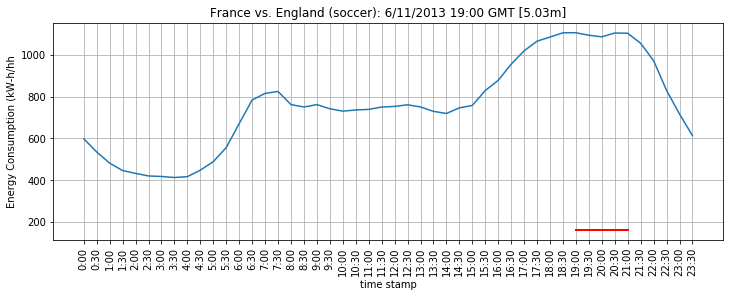

In [5]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_France_England["tstamp"],df_France_England["sigma"])
plt.xticks(rotation='vertical')
plt.title("France vs. England (soccer): 6/11/2013 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '21:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.show()

In [6]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_France_England["A_sigma"] + df_France_England["B_sigma"] + df_France_England["C_sigma"]
Acorn2  = df_France_England["D_sigma"] + df_France_England["E_sigma"]
Acorn3  = df_France_England["F_sigma"] + df_France_England["G_sigma"] + df_France_England["H_sigma"] \
                                           + df_France_England["I_sigma"] + df_France_England["J_sigma"]
Acorn4  = df_France_England["K_sigma"] + df_France_England["L_sigma"] + df_France_England["M_sigma"] \
                                           + df_France_England["N_sigma"]
Acorn5  = df_France_England["O_sigma"] + df_France_England["P_sigma"] + df_France_England["Q_sigma"]

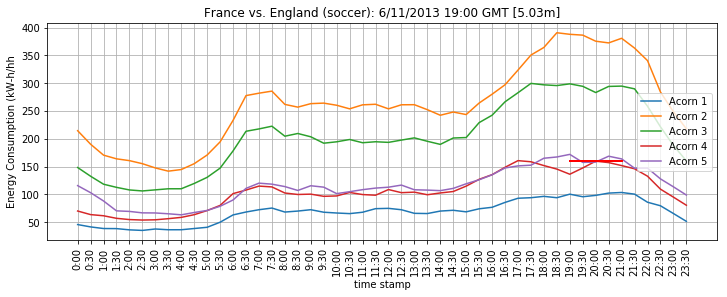

In [7]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_France_England["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_France_England["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_France_England["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_France_England["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_France_England["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("France vs. England (soccer): 6/11/2013 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '21:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [8]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

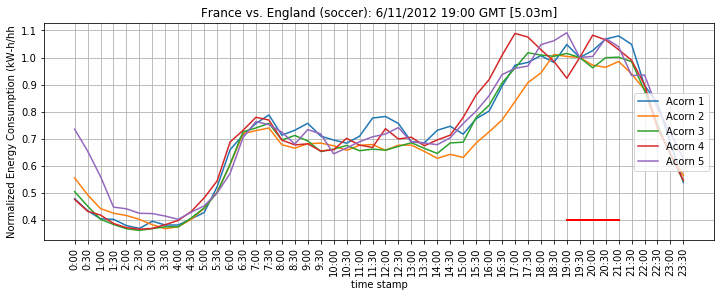

In [17]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_France_England["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_France_England["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_France_England["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_France_England["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_France_England["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("France vs. England (soccer): 6/11/2013 19:00 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['19:00', '21:00'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [18]:
# Create a dataframe representing energy consumption for February 11th 2013, the day
# of the England vs. Scotland game.

df_England_Ukraine = df.loc[df['day']==19]
df_England_Ukraine = df_England_Ukraine.set_index(df_England_Ukraine["tstamp"])
df_England_Ukraine.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2013-06-11 00:00:00,27.026,2.572,16.245,31.658,183.008,62.943,16.546,45.949,3.641,...,81,85,677,36,4250,598.200,0.140753,0.231589,11,0:00
0:30,2013-06-11 00:30:00,25.616,2.099,13.897,29.690,160.669,57.202,16.881,41.408,4.319,...,82,84,676,36,4249,534.822,0.125870,0.197497,11,0:30
1:00,2013-06-11 01:00:00,22.832,2.106,13.768,27.197,143.498,52.496,16.316,39.009,3.058,...,82,84,676,36,4249,481.836,0.113400,0.171658,11,1:00
1:30,2013-06-11 01:30:00,23.505,2.318,12.732,27.060,137.008,48.554,15.699,37.950,3.026,...,82,84,676,36,4249,446.132,0.104997,0.148780,11,1:30
2:00,2013-06-11 02:00:00,21.215,2.444,12.668,26.820,133.999,45.406,13.928,38.648,2.932,...,82,84,676,36,4249,432.580,0.101807,0.146512,11,2:00


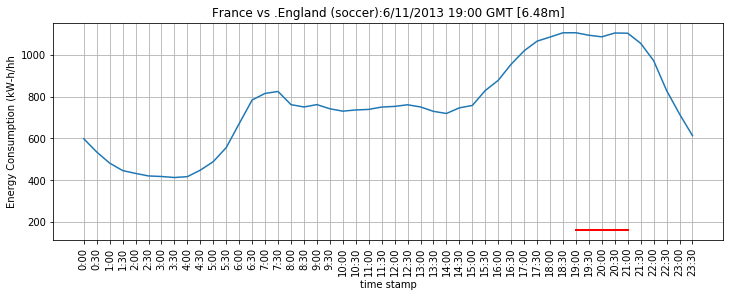

In [19]:
# Create a plotting function.

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh)")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

# Enter details for the France vs. England game, which took place on day 11
# between 19:00 and 21:00 (approx).

dfevent = df_France_England
title   = "France vs .England (soccer):6/11/2013 19:00 GMT [6.48m]"
tsb     = '19:00'
tse     = '21:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

In [20]:
# Create a dataframe representing energy consumption for February 11th 2013, the day
# of the France vs. England game.

df_France_England = df.loc[df['day']==11]
df_France_England = df_France_England.set_index(df_France_England["tstamp"])
df_France_England.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2013-06-11 00:00:00,27.026,2.572,16.245,31.658,183.008,62.943,16.546,45.949,3.641,...,81,85,677,36,4250,598.200,0.140753,0.231589,11,0:00
0:30,2013-06-11 00:30:00,25.616,2.099,13.897,29.690,160.669,57.202,16.881,41.408,4.319,...,82,84,676,36,4249,534.822,0.125870,0.197497,11,0:30
1:00,2013-06-11 01:00:00,22.832,2.106,13.768,27.197,143.498,52.496,16.316,39.009,3.058,...,82,84,676,36,4249,481.836,0.113400,0.171658,11,1:00
1:30,2013-06-11 01:30:00,23.505,2.318,12.732,27.060,137.008,48.554,15.699,37.950,3.026,...,82,84,676,36,4249,446.132,0.104997,0.148780,11,1:30
2:00,2013-06-11 02:00:00,21.215,2.444,12.668,26.820,133.999,45.406,13.928,38.648,2.932,...,82,84,676,36,4249,432.580,0.101807,0.146512,11,2:00


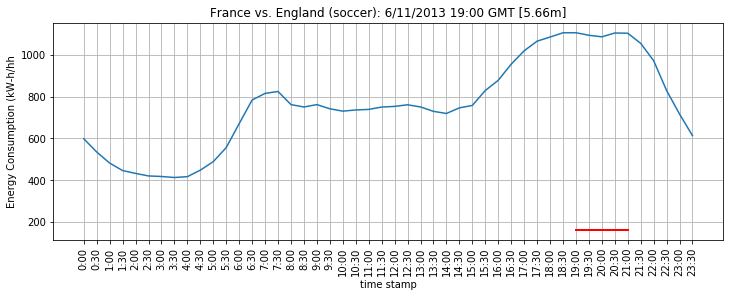

In [21]:
# Enter details for the England vs. Wales game, which took place on day 11
# between 19:00 and 21:00 (approx).

dfevent = df_France_England
title   = "France vs. England (soccer): 6/11/2013 19:00 GMT [5.66m]"
tsb     = '19:00'
tse     = '21:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)